# Metadados

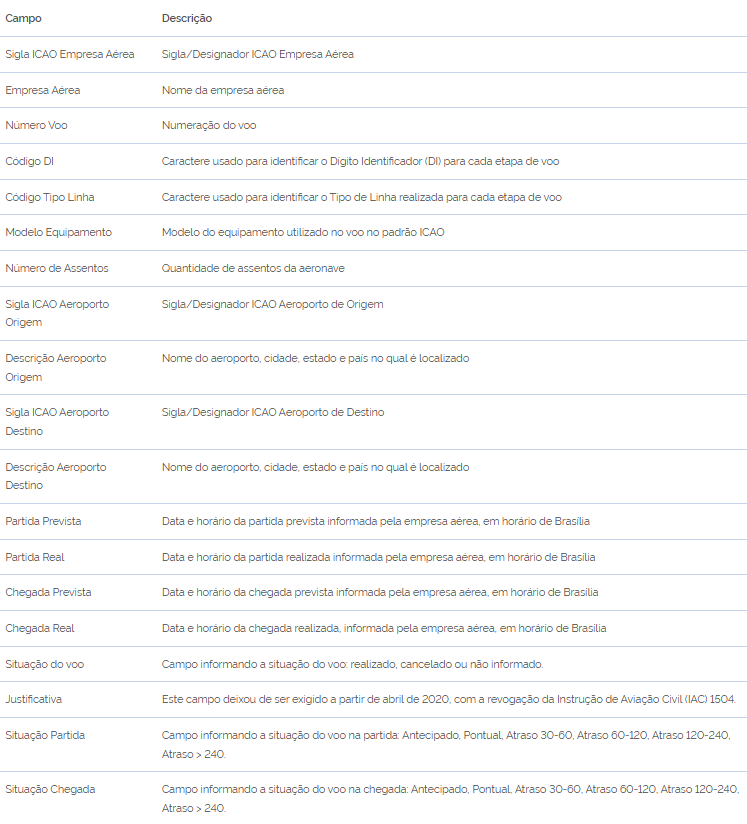

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Defina o caminho onde o arquivo foi salvo
path_do_dataset = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/Dados ANAC/dados_anac_completo_2023_2025.csv'

# Carregue o dataset de volta para um DataFrame
df_carregado = pd.read_csv(path_do_dataset, sep=';')

# Exiba as primeiras linhas para verificar
print("Dataset carregado com sucesso!")
display(df_carregado.head())

Dataset carregado com sucesso!


,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,ds_justificativa,dt_referencia,ds_situacao_partida,ds_situacao_chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/01/2023 00:05,31/12/2022 23:59,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 08:37,01/01/2023 08:12,REALIZADO,NaN,01/01/2023,Antecipado,Antecipado
1,AAL,"AMERICAN AIRLINES, INC.",0905,0,I,B788,295,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 21:45,01/01/2023 00:56,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/01/2023 06:20,01/01/2023 09:03,REALIZADO,NaN,01/01/2023,Antecipado,Antecipado
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 00:00,31/12/2022 23:54,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 06:30,01/01/2023 07:52,REALIZADO,NaN,01/01/2023,Antecipado,Atraso 60-120
3,AAL,"AMERICAN AIRLINES, INC.",0929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 21:45,01/01/2023 21:51,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/01/2023 06:20,02/01/2023 06:33,REALIZADO,NaN,01/01/2023,Pontual,Pontual
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 22:00,01/01/2023 22:27,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2023 06:55,02/01/2023 06:33,REALIZADO,NaN,01/01/2023,Pontual,Antecipado


In [6]:
print("Informações do DataFrame:")
df_carregado.info()
print("\nValores Ausentes:")
print(df_carregado.isnull().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804566 entries, 0 to 2804565
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   sg_empresa_icao        object 
 1   nm_empresa             object 
 2   nr_voo                 object 
 3   cd_di                  object 
 4   cd_tipo_linha          object 
 5   sg_equipamento_icao    object 
 6   nr_assentos_ofertados  int64  
 7   sg_icao_origem         object 
 8   nm_aerodromo_origem    object 
 9   dt_partida_prevista    object 
 10  dt_partida_real        object 
 11  sg_icao_destino        object 
 12  nm_aerodromo_destino   object 
 13  dt_chegada_prevista    object 
 14  dt_chegada_real        object 
 15  ds_situacao_voo        object 
 16  ds_justificativa       float64
 17  dt_referencia          object 
 18  ds_situacao_partida    object 
 19  ds_situacao_chegada    object 
dtypes: float64(1), int64(1), object(18)
memory usage: 427.9+ MB

Val

# Contextualizando e entendo os dados

Os códigos de tipo de linha ANAC (N, I, G, C, X) referem-se à natureza ou tipo de tráfego aéreo em um determinado voo ou segmento de voo, utilizados para fins de registro e estatística pela Agência Nacional de Aviação Civil (ANAC). Eles indicam se o voo é nacional, internacional, de carga, etc.

O significado de cada código é:

**N - Trânsito Nacional**: Indica que o objeto (passageiro ou carga) foi transportado em um voo com origem e destino dentro do território nacional, ou fez conexão com outro voo nacional.

**I - Trânsito Internacional**: Indica que o objeto foi transportado em um voo com origem ou destino internacional, ou fez conexão com outro voo internacional.

**G - Carga (Internacional)**: Especificamente relacionado ao transporte de carga em voos internacionais (presente em contextos específicos de processamento de dados).

**C - Carga (Nacional)**: Especificamente relacionado ao transporte de carga em voos nacionais (presente em contextos específicos de processamento de dados).

**X - (Geralmente indica Vazio ou Outros/Exceção)**: Em alguns sistemas de dados, "X" ou um espaço em branco pode indicar dados não aplicáveis, voo vazio (sem passageiros/carga pagante) ou alguma outra categoria de exceção não especificada nas principais.

In [5]:
df_carregado['cd_tipo_linha'].value_counts(dropna=False)

,count
cd_tipo_linha,
N,2267970
I,390794
G,60276
C,59677
X,25377
NaN,472


Para isso iremos utilizar apenas o Transito Nacional (**N**) para trabalharmos com os atrasos de voos

In [7]:
voos_nacionais_br = df_carregado

In [8]:
print(voos_nacionais_br.isnull().sum())

sg_empresa_icao                0
nm_empresa                     0
nr_voo                         0
cd_di                          0
cd_tipo_linha                472
sg_equipamento_icao            0
nr_assentos_ofertados          0
sg_icao_origem                 0
nm_aerodromo_origem            0
dt_partida_prevista        88593
dt_partida_real           118149
sg_icao_destino                0
nm_aerodromo_destino           0
dt_chegada_prevista        88595
dt_chegada_real           118149
ds_situacao_voo                0
ds_justificativa         2804566
dt_referencia                  0
ds_situacao_partida       206742
ds_situacao_chegada       206742
dtype: int64


In [9]:
voos_nacionais_br = voos_nacionais_br.drop('ds_justificativa', axis=1)

In [10]:
voos_nacionais_br.isnull().sum()

,0
sg_empresa_icao,0
nm_empresa,0
nr_voo,0
cd_di,0
cd_tipo_linha,472
sg_equipamento_icao,0
nr_assentos_ofertados,0
sg_icao_origem,0
nm_aerodromo_origem,0
dt_partida_prevista,88593


## Contexto sobre as 4 colunas de data

(**dt_partida_prevista, dt_partida_real, dt_chegada_prevista e dt_chegada_real**)

### Análise de Valores Nulos nas Colunas de Data/Hora

#### 1. Cenário: `dt_partida_real` é NULO

In [ ]:
# Filtrar linhas onde dt_partida_real é nulo
df_partida_real_null = voos_nacionais_br[voos_nacionais_br['dt_partida_real'].isnull()]

print(f"Total de linhas com 'dt_partida_real' nulo: {len(df_partida_real_null)}")

# Verificar se 'dt_partida_prevista' está sempre preenchido nestas linhas
partida_prevista_presente_when_real_null = df_partida_real_null['dt_partida_prevista'].notnull().all()
print(f"'dt_partida_prevista' está sempre presente quando 'dt_partida_real' é nulo: {partida_prevista_presente_when_real_null}")

# Contar valores nulos de 'dt_partida_prevista' nessas linhas
nan_partida_prevista_when_real_null = df_partida_real_null['dt_partida_prevista'].isnull().sum()
print(f"Número de 'dt_partida_prevista' nulos quando 'dt_partida_real' é nulo: {nan_partida_prevista_when_real_null}")

# Analisar a situação do voo para essas linhas
print("Situação do voo quando 'dt_partida_real' é nulo:")
display(df_partida_real_null['ds_situacao_voo'].value_counts(dropna=False))

Total de linhas com 'dt_partida_real' nulo: 62374
'dt_partida_prevista' está sempre presente quando 'dt_partida_real' é nulo: True
Número de 'dt_partida_prevista' nulos quando 'dt_partida_real' é nulo: 0
Situação do voo quando 'dt_partida_real' é nulo:


,count
ds_situacao_voo,
CANCELADO,60239
NÃO INFORMADO,2135


#### 2. Cenário: `dt_partida_prevista` é NULO

In [ ]:
# Filtrar linhas onde dt_partida_prevista é nulo
df_partida_prevista_null = voos_nacionais_br[voos_nacionais_br['dt_partida_prevista'].isnull()]

print(f"Total de linhas com 'dt_partida_prevista' nulo: {len(df_partida_prevista_null)}")

# Verificar se 'dt_partida_real' está sempre preenchido nestas linhas
partida_real_presente_when_prevista_null = df_partida_prevista_null['dt_partida_real'].notnull().all()
print(f"'dt_partida_real' está sempre presente quando 'dt_partida_prevista' é nulo: {partida_real_presente_when_prevista_null}")

# Contar valores nulos de 'dt_partida_real' nessas linhas
nan_partida_real_when_prevista_null = df_partida_prevista_null['dt_partida_real'].isnull().sum()
print(f"Número de 'dt_partida_real' nulos quando 'dt_partida_prevista' é nulo: {nan_partida_real_when_prevista_null}")

# Analisar a situação do voo para essas linhas
print("Situação do voo quando 'dt_partida_prevista' é nulo:")
display(df_partida_prevista_null['ds_situacao_voo'].value_counts(dropna=False))

Total de linhas com 'dt_partida_prevista' nulo: 50542
'dt_partida_real' está sempre presente quando 'dt_partida_prevista' é nulo: True
Número de 'dt_partida_real' nulos quando 'dt_partida_prevista' é nulo: 0
Situação do voo quando 'dt_partida_prevista' é nulo:


,count
ds_situacao_voo,
REALIZADO,50542


#### 3. Cenário: Ambas as Colunas de Partida são NULAS

In [ ]:
# Verificar linhas onde tanto 'dt_partida_prevista' quanto 'dt_partida_real' são nulas
both_partida_null = voos_nacionais_br[voos_nacionais_br['dt_partida_prevista'].isnull() & voos_nacionais_br['dt_partida_real'].isnull()]

print(f"Número de linhas com 'dt_partida_prevista' E 'dt_partida_real' nulos: {len(both_partida_null)}")

# Analisar a situação do voo para essas linhas (se houver)
if not both_partida_null.empty:
    print("Situação do voo quando ambas as partidas são nulas:")
    display(both_partida_null['ds_situacao_voo'].value_counts(dropna=False))
else:
    print("Não há casos onde ambas as datas de partida (prevista e real) são nulas.")

Número de linhas com 'dt_partida_prevista' E 'dt_partida_real' nulos: 0
Não há casos onde ambas as datas de partida (prevista e real) são nulas.


#### 4. Cenário: Ambas as Colunas de Chegada são NULAS

In [ ]:
# Verificar linhas onde tanto 'dt_chegada_prevista' quanto 'dt_chegada_real' são nulas
both_chegada_null = voos_nacionais_br[voos_nacionais_br['dt_chegada_prevista'].isnull() & voos_nacionais_br['dt_chegada_real'].isnull()]

print(f"Número de linhas com 'dt_chegada_prevista' E 'dt_chegada_real' nulos: {len(both_chegada_null)}")

# Analisar a situação do voo para essas linhas (se houver)
if not both_chegada_null.empty:
    print("Situação do voo quando ambas as chegadas são nulas:")
    display(both_chegada_null['ds_situacao_voo'].value_counts(dropna=False))
else:
    print("Não há casos onde ambas as datas de chegada (prevista e real) são nulas.")

Número de linhas com 'dt_chegada_prevista' E 'dt_chegada_real' nulos: 0
Não há casos onde ambas as datas de chegada (prevista e real) são nulas.


#### 5. Cenário: `dt_chegada_prevista` é NULO e `dt_chegada_real` NÃO é NULO

In [ ]:
# Filtrar linhas onde dt_chegada_prevista é nulo e dt_chegada_real não é nulo
df_chegada_prevista_null_real_notnull = voos_nacionais_br[
    voos_nacionais_br['dt_chegada_prevista'].isnull() &
    voos_nacionais_br['dt_chegada_real'].notnull()
]

print(f"Total de linhas com 'dt_chegada_prevista' nulo e 'dt_chegada_real' não nulo: {len(df_chegada_prevista_null_real_notnull)}")

# Analisar a situação do voo para essas linhas
if not df_chegada_prevista_null_real_notnull.empty:
    print("Situação do voo quando 'dt_chegada_prevista' é nulo e 'dt_chegada_real' não nulo:")
    display(df_chegada_prevista_null_real_notnull['ds_situacao_voo'].value_counts(dropna=False))
else:
    print("Não há casos onde 'dt_chegada_prevista' é nulo e 'dt_chegada_real' não nulo.")

Total de linhas com 'dt_chegada_prevista' nulo e 'dt_chegada_real' não nulo: 50542
Situação do voo quando 'dt_chegada_prevista' é nulo e 'dt_chegada_real' não nulo:


,count
ds_situacao_voo,
REALIZADO,50542


#### 6. Cenário: `dt_chegada_real` é NULO e `dt_chegada_prevista` NÃO é NULO

In [ ]:
# Filtrar linhas onde dt_chegada_real é nulo e dt_chegada_prevista não é nulo
df_chegada_real_null_prevista_notnull = voos_nacionais_br[
    voos_nacionais_br['dt_chegada_real'].isnull() &
    voos_nacionais_br['dt_chegada_prevista'].notnull()
]

print(f"Total de linhas com 'dt_chegada_real' nulo e 'dt_chegada_prevista' não nulo: {len(df_chegada_real_null_prevista_notnull)}")

# Analisar a situação do voo para essas linhas
if not df_chegada_real_null_prevista_notnull.empty:
    print("Situação do voo quando 'dt_chegada_real' é nulo e 'dt_chegada_prevista' não nulo:")
    display(df_chegada_real_null_prevista_notnull['ds_situacao_voo'].value_counts(dropna=False))
else:
    print("Não há casos onde 'dt_chegada_real' é nulo e 'dt_chegada_prevista' não nulo.")

Total de linhas com 'dt_chegada_real' nulo e 'dt_chegada_prevista' não nulo: 62374
Situação do voo quando 'dt_chegada_real' é nulo e 'dt_chegada_prevista' não nulo:


,count
ds_situacao_voo,
CANCELADO,60239
NÃO INFORMADO,2135


## 7. Resumo e Entendimento das Dependências

Com a análise das colunas de partida e chegada no DataFrame `voos_nacionais_br`, podemos concluir o seguinte sobre os padrões de valores nulos:

#### **Colunas de Partida (`dt_partida_prevista`, `dt_partida_real`)**

*   **`dt_partida_real` é NULO (`62.374` linhas):**
    *   `dt_partida_prevista` **NÃO É NULO** nestes casos. Isso sugere que sempre há uma previsão, mesmo que a partida real não tenha ocorrido.
    *   A `ds_situacao_voo` é predominantemente **CANCELADO** (`60.239` voos) ou **NÃO INFORMADO** (`2.135` voos). Isso indica que a ausência de uma partida real está diretamente ligada a voos que não foram executados ou cujos dados de execução não foram registrados.

*   **`dt_partida_prevista` é NULO (`50.542` linhas):**
    *   `dt_partida_real` **NÃO É NULO** nestes casos. Isso implica que, mesmo sem uma previsão registrada, a partida real ocorreu.
    *   A `ds_situacao_voo` é **REALIZADO** em todos esses casos (`50.542` voos). Isso pode acontecer com voos extras, fretamentos, ou situações em que a previsão não foi formalmente registrada, mas o voo foi executado.

*   **Ambas as Colunas de Partida são NULAS:**
    *   Não há casos (`0` linhas) onde ambas (`dt_partida_prevista` E `dt_partida_real`) são nulas. Isso é um forte indicativo de que **todo voo tem que ter, no mínimo, ou uma partida prevista ou uma partida real registrada** no dataset.

#### **Colunas de Chegada (`dt_chegada_prevista`, `dt_chegada_real`)**

*   **`dt_chegada_prevista` é NULO e `dt_chegada_real` NÃO é NULO (`50.542` linhas):**
    *   A `ds_situacao_voo` é **REALIZADO** em todos esses casos (`50.542` voos). Assim como na partida, isso sugere voos realizados sem uma previsão de chegada formalmente registrada, ou com a previsão omitida, mas a chegada de fato ocorreu.

*   **`dt_chegada_real` é NULO e `dt_chegada_prevista` NÃO é NULO (`62.374` linhas):**
    *   A `ds_situacao_voo` é predominantemente **CANCELADO** (`60.239` voos) ou **NÃO INFORMADO** (`2.135` voos). Similarmente à partida, se o voo foi cancelado ou não informado, ele não teve uma chegada real, mas havia uma chegada prevista.

*   **Ambas as Colunas de Chegada são NULAS:**
    *   Não há casos (`0` linhas) onde tanto `dt_chegada_prevista` quanto `dt_chegada_real` são nulas. Isso faz sentido, pois se não há partida ou a situação é desconhecida, não haverá informações de chegada.

#### **Todas as 4 Colunas de Data/Hora são NULAS:**

*   Não há casos (`0` linhas) onde todas as 4 colunas de data/hora são nulas. Isso demonstra que **sempre há alguma informação de data/hora presente para cada registro de voo**.

---

**Em síntese, os dados mostram consistência:**

*   **Voos Cancelados/Não Informados:** Geralmente têm `dt_partida_real` e `dt_chegada_real` nulas, mas `dt_partida_prevista` e `dt_chegada_prevista` preenchidas.
*   **Voos Realizados:** Geralmente têm `dt_partida_real` e `dt_chegada_real` preenchidas. Se a contraparte `_prevista` estiver nula para esses voos, sugere que foram voos 'não agendados' ou com dados de agendamento ausentes, mas que efetivamente aconteceram.

Este entendimento é fundamental para qualquer pré-processamento, como a imputação de valores ou a criação de novas features, garantindo que as decisões sejam tomadas de forma lógica e alinhada com o ciclo de vida de um voo.

In [11]:
df_carregado['ds_situacao_partida'].value_counts()

,count
ds_situacao_partida,
Antecipado,1376346
Pontual,987677
Atraso 30-60,135159
Atraso 60-120,61196
Atraso 120-240,25453
Atraso > 240,11993


In [12]:
df_carregado['ds_situacao_chegada'].value_counts(dropna=False)

,count
ds_situacao_chegada,
Antecipado,1506846
Pontual,855998
NaN,206742
Atraso 30-60,136542
Atraso 60-120,61366
Atraso 120-240,25163
Atraso > 240,11909


# Limpando e estruturando os dados

In [15]:
voos_nacionais_br['ds_situacao_voo'].unique()

array(['REALIZADO', 'CANCELADO', 'NÃO INFORMADO'], dtype=object)

In [16]:
voos_nacionais_realizados = voos_nacionais_br[(voos_nacionais_br['ds_situacao_voo'] == 'REALIZADO') & (voos_nacionais_br['nm_aerodromo_origem'].str.endswith('BRASIL')) ]

In [17]:
voos_nacionais_realizados.shape

(2464916, 19)

In [18]:
voos_nacionais_realizados.isnull().sum()

,0
sg_empresa_icao,0
nm_empresa,0
nr_voo,0
cd_di,0
cd_tipo_linha,0
sg_equipamento_icao,0
nr_assentos_ofertados,0
sg_icao_origem,0
nm_aerodromo_origem,0
dt_partida_prevista,72215


Código DI	Descrição Técnica (Pós-abril de 2020)	Implicação no Modelo Preditivo

**0	- Etapa Regular**:
Base para o comportamento padrão da malha aérea.

**2 -	Etapa Extra**:
Introduz variáveis de incerteza por não ser um voo planejado a longo prazo.

**3 - Etapa de Retorno**:
Frequentemente associada a reposicionamento de frota.

**4 -	Inclusão de Etapa**:
Pode indicar desvios por problemas técnicos ou meteorológicos.

**7	- Etapa de Voo de Fretamento**:
Operações sazonais com padrões distintos das linhas regulares.

**9	- Etapa de Voo Charter**:
Frequentemente operado fora de horários de pico.

**D	- Etapa Duplicada**:
Ruído de dado que deve ser tratado na limpeza.

In [19]:
voos_nacionais_realizados['cd_di'].value_counts()

,count
cd_di,
0,2376102
2,26782
6,14992
3,10580
9,9600
4,9048
7,8270
1,7534
D,1377


#### 1. A Interpretação: Voos sem Planejamento Prévio (Etapas não previstas)
No contexto da aviação brasileira, o dataset VRA consolida tanto os voos que estavam previstos no sistema de horários da ANAC (HOTRAN) quanto voos que ocorreram de forma extraordinária.

Quando as colunas de "Partida Prevista" e "Chegada Prevista" são nulas, significa que esses voos não possuíam um registro de horário planejado no sistema regulatório. Como consequência direta, as colunas de status (ds_situacao_partida e ds_situacao_chegada) também ficam nulas, pois o sistema da ANAC só consegue rotular um voo como "Pontual" ou "Atrasado" se ele tiver um horário previsto para servir de comparação.

In [20]:
linhas_com_nulos = voos_nacionais_realizados[voos_nacionais_realizados.isnull().any(axis=1)]
print(f"Total de linhas com dados nulos: {len(linhas_com_nulos)}")
display(linhas_com_nulos.head())

Total de linhas com dados nulos: 72215


,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada
11,AAL,"AMERICAN AIRLINES, INC.",0974,2,X,B772,272,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,NaN,01/01/2023 22:47,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,NaN,02/01/2023 08:27,REALIZADO,01/01/2023,NaN,NaN
38,AAL,"AMERICAN AIRLINES, INC.",0974,2,X,B772,272,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,NaN,03/01/2023 22:58,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,NaN,04/01/2023 08:41,REALIZADO,03/01/2023,NaN,NaN
77,AAL,"AMERICAN AIRLINES, INC.",0974,2,X,B772,272,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,NaN,06/01/2023 22:51,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,NaN,07/01/2023 08:25,REALIZADO,06/01/2023,NaN,NaN
84,AAL,"AMERICAN AIRLINES, INC.",0950,2,X,B77W,304,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,NaN,07/01/2023 23:24,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,NaN,08/01/2023 08:57,REALIZADO,07/01/2023,NaN,NaN
88,AAL,"AMERICAN AIRLINES, INC.",0962,2,X,B789,285,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,NaN,07/01/2023 21:40,KDFW,DALLAS-FORT WORTH INTERNATIONAL AIRPORT - DALL...,NaN,08/01/2023 08:19,REALIZADO,07/01/2023,NaN,NaN


In [21]:
linhas_com_nulos.shape

(72215, 19)

In [22]:
linhas_com_nulos['cd_di'].value_counts()

,count
cd_di,
2,25288
6,14788
3,10580
4,8957
1,7396
7,1774
9,1446
D,1376
E,610


Podemos perceber que não há nenhum voo de etapa regular (`CD_DI = 0`) nas linhas com nulos, ou seja com o acontecimento de outros tipos de etapas, geralmente causam a falta de descrição da situacao de partida e chegada, além dos seus horários previstos

Dessa forma vamos deletar estes dados nulos que não possuem descrição, pois não há sentido os mantermos

In [23]:
# Remove voos que não possuem horário previsto (e consequentemente não possuem rótulo de atraso)
voos_nacionais_realizados = voos_nacionais_realizados.dropna(subset=['dt_partida_prevista', 'ds_situacao_partida'])

In [24]:
linhas_com_nulos = voos_nacionais_realizados[voos_nacionais_realizados.isnull().any(axis=1)]
print(f"Total de linhas com dados nulos: {len(linhas_com_nulos)}")
display(linhas_com_nulos.head())

Total de linhas com dados nulos: 0


,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada


In [25]:
voos_nacionais_realizados['cd_di'].value_counts()

,count
cd_di,
0,2376102
9,8154
7,6496
2,1494
6,204
1,138
4,91
E,21
D,1


### Conversão de Datas

In [26]:
voos_nacionais_realizados.head()

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/01/2023 00:05,31/12/2022 23:59,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 08:37,01/01/2023 08:12,REALIZADO,01/01/2023,Antecipado,Antecipado
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 00:00,31/12/2022 23:54,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 06:30,01/01/2023 07:52,REALIZADO,01/01/2023,Antecipado,Atraso 60-120
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 22:00,01/01/2023 22:27,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2023 06:55,02/01/2023 06:33,REALIZADO,01/01/2023,Pontual,Antecipado
5,AAL,"AMERICAN AIRLINES, INC.",0950,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 23:20,01/01/2023 23:18,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,02/01/2023 09:03,02/01/2023 09:43,REALIZADO,01/01/2023,Antecipado,Atraso 30-60
8,AAL,"AMERICAN AIRLINES, INC.",0958,0,I,B788,295,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2023 10:50,01/01/2023 12:50,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2023 19:10,01/01/2023 21:48,REALIZADO,01/01/2023,Atraso 60-120,Atraso 120-240


In [27]:
voos_nacionais_realizados['dt_partida_prevista'] = pd.to_datetime(voos_nacionais_realizados['dt_partida_prevista'], format='%d/%m/%Y %H:%M')
voos_nacionais_realizados['dt_partida_real'] = pd.to_datetime(voos_nacionais_realizados['dt_partida_real'], format='%d/%m/%Y %H:%M')
voos_nacionais_realizados['dt_chegada_prevista'] = pd.to_datetime(voos_nacionais_realizados['dt_chegada_prevista'], format='%d/%m/%Y %H:%M')
voos_nacionais_realizados['dt_chegada_real'] = pd.to_datetime(voos_nacionais_realizados['dt_chegada_real'], format='%d/%m/%Y %H:%M')

### Criação do Target (Alvo Binário)

In [28]:
voos_nacionais_realizados['ds_situacao_partida'].value_counts()

,count
ds_situacao_partida,
Antecipado,1299070
Pontual,897317
Atraso 30-60,117017
Atraso 60-120,51350
Atraso 120-240,20111
Atraso > 240,7836


In [29]:
atraso_direto = ['Atraso 30-60', 'Atraso 60-120', 'Atraso 120-240', 'Atraso > 240']

voos_nacionais_realizados['target_atraso'] = voos_nacionais_realizados['ds_situacao_partida'].apply(lambda x: 1 if x in atraso_direto else 0)

# Verifique o desbalanceamento das classes
print(voos_nacionais_realizados['target_atraso'].value_counts(normalize=True))

target_atraso
0    0.917953
1    0.082047
Name: proportion, dtype: float64


In [82]:
voos_nacionais_realizados.head()

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada,target_atraso
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,2023-01-01 00:05:00,2022-12-31 23:59:00,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2023-01-01 08:37:00,2023-01-01 08:12:00,REALIZADO,01/01/2023,Antecipado,Antecipado,0
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 00:00:00,2022-12-31 23:54:00,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2023-01-01 06:30:00,2023-01-01 07:52:00,REALIZADO,01/01/2023,Antecipado,Atraso 60-120,0
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 22:00:00,2023-01-01 22:27:00,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2023-01-02 06:55:00,2023-01-02 06:33:00,REALIZADO,01/01/2023,Pontual,Antecipado,0
5,AAL,"AMERICAN AIRLINES, INC.",0950,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 23:20:00,2023-01-01 23:18:00,KJFK,JOHN F. KENNEDY INTERNATIONAL AIRPORT - NEW YO...,2023-01-02 09:03:00,2023-01-02 09:43:00,REALIZADO,01/01/2023,Antecipado,Atraso 30-60,0
8,AAL,"AMERICAN AIRLINES, INC.",0958,0,I,B788,295,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 10:50:00,2023-01-01 12:50:00,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",2023-01-01 19:10:00,2023-01-01 21:48:00,REALIZADO,01/01/2023,Atraso 60-120,Atraso 120-240,1


## Carregar Datasets de Aeroportos

Carregar os dois datasets de aeroportos: 'https://www.worlddata.info/downloads/airports.csv' (worlddata_airports_df) e 'https://davidmegginson.github.io/ourairports-data/airports.csv' (ourairports_df) em DataFrames separados.


In [30]:
url_worlddata_airports = 'https://www.worlddata.info/downloads/airports.csv'
worlddata_airports_df = pd.read_csv(url_worlddata_airports)

print("Dataset 'airports.csv' from worlddata.info loaded successfully!")
worlddata_airports_df.head()

Dataset 'airports.csv' from worlddata.info loaded successfully!


,IATA,ICAO,Airport name,Country,City,Information
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...
1,AAB,YARY,Arrabury Airport,Australia,Tanbar,https://www.worlddata.info/oceania/australia/a...
2,AAC,HEAR,El Arish International Airport,Egypt,El Arish,https://www.worlddata.info/africa/egypt/airpor...
3,AAD,NaN,Adado Airport,Somalia,Adado,https://www.worlddata.info/africa/somalia/airp...
4,AAE,DABB,Annaba Rabah Bitat Airport,Algeria,Annaba,https://www.worlddata.info/africa/algeria/airp...


In [31]:
url_ourairports = 'https://davidmegginson.github.io/ourairports-data/airports.csv'
ourairports_df = pd.read_csv(url_ourairports)

print("Dataset 'airports.csv' from ourairports-data loaded successfully!\n")
display(ourairports_df.head())

print("\nInformation about ourairports_df:\n")
ourairports_df.info()

Dataset 'airports.csv' from ourairports-data loaded successfully!



,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,icao_code,iata_code,gps_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total RF Heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,NaN,NaN,K00A,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,NaN,NaN,00AA,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,NaN,NaN,00AK,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,NaN,NaN,00AL,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,Katmai Lodge Airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,NaN,NaN,00AN,00AN,NaN,NaN,NaN



Information about ourairports_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84435 entries, 0 to 84434
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 84435 non-null  int64  
 1   ident              84435 non-null  object 
 2   type               84435 non-null  object 
 3   name               84435 non-null  object 
 4   latitude_deg       84435 non-null  float64
 5   longitude_deg      84435 non-null  float64
 6   elevation_ft       69810 non-null  float64
 7   continent          44999 non-null  object 
 8   iso_country        84143 non-null  object 
 9   iso_region         84435 non-null  object 
 10  municipality       79667 non-null  object 
 11  scheduled_service  84435 non-null  object 
 12  icao_code          9536 non-null   object 
 13  iata_code          9060 non-null   object 
 14  gps_code           43844 non-null  object 
 15  local_code         35898 non-null 

## Tratando os dados dos aeroportos

O próximo passo é preparar o dataset `ourairports_df` selecionando as colunas mais relevantes e renomeando elas, para ter uma clareza antes de juntar com o dataset `worlddata_airports_df`.

In [30]:
ourairports_coords = ourairports_df[['icao_code', 'iata_code', 'latitude_deg', 'longitude_deg']].copy()
ourairports_coords.rename(columns={'icao_code': 'ICAO_ourairports', 'iata_code': 'IATA_ourairports'}, inplace=True)

print("Prepared `ourairports_coords` DataFrame:")
display(ourairports_coords.head())

Prepared `ourairports_coords` DataFrame:


,ICAO_ourairports,IATA_ourairports,latitude_deg,longitude_deg
0,NaN,NaN,40.070985,-74.933689
1,NaN,NaN,38.704022,-101.473911
2,NaN,NaN,59.947733,-151.692524
3,NaN,NaN,34.864799,-86.770302
4,NaN,NaN,59.093287,-156.456699


**Reasoning**:
Standardizing the ICAO and IATA columns in both `worlddata_airports_df` and `ourairports_coords` is crucial for accurate merging and analysis. This involves converting all entries to uppercase strings to ensure consistency and replacing any string representations of 'NAN' (case-insensitive) with the NumPy `np.nan` value to properly handle missing data.



In [31]:
for col in ['ICAO', 'IATA']:
    worlddata_airports_df[col] = worlddata_airports_df[col].astype(str).str.upper().replace('NAN', np.nan)

for col in ['ICAO_ourairports', 'IATA_ourairports']:
    ourairports_coords[col] = ourairports_coords[col].astype(str).str.upper().replace('NAN', np.nan)

print("ICAO and IATA columns in worlddata_airports_df standardized.")
print("ICAO and IATA columns in ourairports_coords standardized.")

display(worlddata_airports_df.head())
display(ourairports_coords.head())

ICAO and IATA columns in worlddata_airports_df standardized.
ICAO and IATA columns in ourairports_coords standardized.


,IATA,ICAO,Airport name,Country,City,Information
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...
1,AAB,YARY,Arrabury Airport,Australia,Tanbar,https://www.worlddata.info/oceania/australia/a...
2,AAC,HEAR,El Arish International Airport,Egypt,El Arish,https://www.worlddata.info/africa/egypt/airpor...
3,AAD,NaN,Adado Airport,Somalia,Adado,https://www.worlddata.info/africa/somalia/airp...
4,AAE,DABB,Annaba Rabah Bitat Airport,Algeria,Annaba,https://www.worlddata.info/africa/algeria/airp...


,ICAO_ourairports,IATA_ourairports,latitude_deg,longitude_deg
0,NaN,NaN,40.070985,-74.933689
1,NaN,NaN,38.704022,-101.473911
2,NaN,NaN,59.947733,-151.692524
3,NaN,NaN,34.864799,-86.770302
4,NaN,NaN,59.093287,-156.456699


Agora que as colunas ICAO e IATA estão padronizadas em ambos os dataframes, o próximo passo lógico é tentar preencher os valores nulos de 'ICAO' e 'IATA' no `worlddata_airports_df` mesclando-o com `ourairports_coords`. Isso utilizará as informações presentes no dataframe `ourairports_coords` para enriquecer o `worlddata_airports_df`.

In [32]:
print(f"Initial null ICAO in worlddata_airports_df: {worlddata_airports_df['ICAO'].isnull().sum()}")
print(f"Initial null IATA in worlddata_airports_df: {worlddata_airports_df['IATA'].isnull().sum()}")

# Try to fill null ICAO in worlddata_airports_df using ourairports_coords based on IATA match
# Perform a left merge from worlddata_airports_df to ourairports_coords on IATA codes
merged_iata_to_icao = pd.merge(
    worlddata_airports_df[worlddata_airports_df['ICAO'].isnull()], # Only rows with null ICAO
    ourairports_coords[['ICAO_ourairports', 'IATA_ourairports']],
    left_on='IATA',
    right_on='IATA_ourairports',
    how='left'
)

# Update ICAO in worlddata_airports_df for matching rows where ICAO is currently null
# Ensure unique index for mapping
worlddata_airports_df.loc[worlddata_airports_df['ICAO'].isnull(), 'ICAO'] = \
    worlddata_airports_df[worlddata_airports_df['ICAO'].isnull()]['IATA'].map(
        merged_iata_to_icao.drop_duplicates(subset=['IATA_ourairports']).set_index('IATA_ourairports')['ICAO_ourairports']
    )


# Try to fill null IATA in worlddata_airports_df using ourairports_coords based on ICAO match
# Perform a left merge from worlddata_airports_df to ourairports_coords on ICAO codes
merged_icao_to_iata = pd.merge(
    worlddata_airports_df[worlddata_airports_df['IATA'].isnull()], # Only rows with null IATA
    ourairports_coords[['ICAO_ourairports', 'IATA_ourairports']],
    left_on='ICAO',
    right_on='ICAO_ourairports',
    how='left'
)

# Update IATA in worlddata_airports_df for matching rows where IATA is currently null
# Ensure unique index for mapping
worlddata_airports_df.loc[worlddata_airports_df['IATA'].isnull(), 'IATA'] = \
    worlddata_airports_df[worlddata_airports_df['IATA'].isnull()]['ICAO'].map(
        merged_icao_to_iata.drop_duplicates(subset=['ICAO_ourairports']).set_index('ICAO_ourairports')['IATA_ourairports']
    )


print(f"Null ICAO in worlddata_airports_df after first imputation: {worlddata_airports_df['ICAO'].isnull().sum()}")
print(f"Null IATA in worlddata_airports_df after first imputation: {worlddata_airports_df['IATA'].isnull().sum()}")

print("Filled null ICAO and IATA values in `worlddata_airports_df` using `ourairports_coords`.")

Initial null ICAO in worlddata_airports_df: 951
Initial null IATA in worlddata_airports_df: 1
Null ICAO in worlddata_airports_df after first imputation: 695
Null IATA in worlddata_airports_df after first imputation: 1
Filled null ICAO and IATA values in `worlddata_airports_df` using `ourairports_coords`.


Agora que as colunas ICAO e IATA no `worlddata_airports_df` foram parcialmente preenchidas, o próximo passo é mesclar a latitude e longitude de `ourairports_coords` no `worlddata_airports_df` usando os códigos ICAO e IATA para uma correspondência abrangente. Isso enriquecerá o `worlddata_airports_df` com coordenadas geográficas. Realizarei duas mesclagens: uma baseada no ICAO e, em seguida, outra para as entradas restantes não correspondidas, baseada no IATA. As mesclagens serão do tipo left join para preservar todas as linhas do `worlddata_airports_df`.

In [33]:
worlddata_airports_df['latitude_deg'] = np.nan
worlddata_airports_df['longitude_deg'] = np.nan

print(f"Null latitude_deg in worlddata_airports_df before merge: {worlddata_airports_df['latitude_deg'].isnull().sum()}")
print(f"Null longitude_deg in worlddata_airports_df before merge: {worlddata_airports_df['longitude_deg'].isnull().sum()}")

# Merge coordinates from ourairports_coords based on ICAO
worlddata_airports_df = pd.merge(
    worlddata_airports_df,
    ourairports_coords[['ICAO_ourairports', 'latitude_deg', 'longitude_deg']].drop_duplicates(subset=['ICAO_ourairports']),
    left_on='ICAO',
    right_on='ICAO_ourairports',
    how='left',
    suffixes=('', '_icao_merge')
)

# Fill null latitude_deg and longitude_deg in worlddata_airports_df with values from the ICAO merge
worlddata_airports_df['latitude_deg'] = worlddata_airports_df['latitude_deg'].fillna(worlddata_airports_df['latitude_deg_icao_merge'])
worlddata_airports_df['longitude_deg'] = worlddata_airports_df['longitude_deg'].fillna(worlddata_airports_df['longitude_deg_icao_merge'])

# Drop temporary columns from ICAO merge
worlddata_airports_df.drop(columns=['ICAO_ourairports', 'latitude_deg_icao_merge', 'longitude_deg_icao_merge'], inplace=True)

# Merge coordinates from ourairports_coords based on IATA for remaining nulls
worlddata_airports_df = pd.merge(
    worlddata_airports_df,
    ourairports_coords[['IATA_ourairports', 'latitude_deg', 'longitude_deg']].drop_duplicates(subset=['IATA_ourairports']),
    left_on='IATA',
    right_on='IATA_ourairports',
    how='left',
    suffixes=('', '_iata_merge')
)

# Fill remaining null latitude_deg and longitude_deg with values from the IATA merge
worlddata_airports_df['latitude_deg'] = worlddata_airports_df['latitude_deg'].fillna(worlddata_airports_df['latitude_deg_iata_merge'])
worlddata_airports_df['longitude_deg'] = worlddata_airports_df['longitude_deg'].fillna(worlddata_airports_df['longitude_deg_iata_merge'])

# Drop temporary columns from IATA merge
worlddata_airports_df.drop(columns=['IATA_ourairports', 'latitude_deg_iata_merge', 'longitude_deg_iata_merge'], inplace=True)

print(f"Null latitude_deg in worlddata_airports_df after merge: {worlddata_airports_df['latitude_deg'].isnull().sum()}")
print(f"Null longitude_deg in worlddata_airports_df after merge: {worlddata_airports_df['longitude_deg'].isnull().sum()}")
print("Merged coordinates from `ourairports_coords` into `worlddata_airports_df`.")

Null latitude_deg in worlddata_airports_df before merge: 8459
Null longitude_deg in worlddata_airports_df before merge: 8459
Null latitude_deg in worlddata_airports_df after merge: 27
Null longitude_deg in worlddata_airports_df after merge: 27
Merged coordinates from `ourairports_coords` into `worlddata_airports_df`.


Agora que as colunas ICAO e IATA foram parcialmente preenchidas e as coordenadas mescladas, a etapa final para esta subtarefa é exibir quaisquer linhas restantes no `worlddata_airports_df` onde ICAO ou IATA ainda são nulos, e então exibir o cabeçalho do `worlddata_airports_df` totalmente processado para mostrar o resultado das operações.

In [34]:
unresolved_airports = worlddata_airports_df[
    (worlddata_airports_df['ICAO'].isnull()) |
    (worlddata_airports_df['IATA'].isnull()) |
    (worlddata_airports_df['latitude_deg'].isnull()) |
    (worlddata_airports_df['longitude_deg'].isnull())
]

print(f"Total de aeroportos não resolvidos (todos os países): {len(unresolved_airports)}")
print("Linhas no worlddata_airports_df com ICAO ou IATA ainda nulos:")
display(unresolved_airports[['Airport name', 'Country', 'ICAO', 'IATA', 'latitude_deg', 'longitude_deg']])

# Salvar os aeroportos não resolvidos em um arquivo CSV
output_file_path = 'unresolved_airports_for_manual_review.csv'
unresolved_airports.to_csv(output_file_path, index=False)
print(f"\nAeroportos não resolvidos salvos em '{output_file_path}' para revisão manual.")

print("\nCabeçalho do worlddata_airports_df totalmente processado:")
display(worlddata_airports_df.head())

Total de aeroportos não resolvidos (todos os países): 723
Linhas no worlddata_airports_df com ICAO ou IATA ainda nulos:


,Airport name,Country,ICAO,IATA,latitude_deg,longitude_deg
18,Apalapsili Airport,Indonesia,NaN,AAS,40.070985,-74.933689
40,Atkamba Airport,Papua New Guinea,NaN,ABP,40.070985,-74.933689
65,Achutupu Airport,Panama,NaN,ACU,40.070985,-74.933689
90,El Daein Airport,Sudan,NaN,ADV,40.070985,-74.933689
97,Adareil Airport,South Sudan,NaN,AEE,40.070985,-74.933689
...,...,...,...,...,...,...
8414,Nyac Airport,United States of America,NaN,ZNC,40.070985,-74.933689
8423,Donaueschingen-Villingen Airport,Germany,EDTD,ZQL,NaN,NaN
8431,Zaraza Airport,Venezuela,SVCE,ZRZ,NaN,NaN
8438,Tête-à-la-Baleine Airport,Canada,NaN,ZTB,40.070985,-74.933689



Aeroportos não resolvidos salvos em 'unresolved_airports_for_manual_review.csv' para revisão manual.

Cabeçalho do worlddata_airports_df totalmente processado:


,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...,-17.352600,-145.509995
1,AAB,YARY,Arrabury Airport,Australia,Tanbar,https://www.worlddata.info/oceania/australia/a...,-26.696390,141.048718
2,AAC,HEAR,El Arish International Airport,Egypt,El Arish,https://www.worlddata.info/africa/egypt/airpor...,31.055324,33.827964
3,AAD,HCAD,Adado Airport,Somalia,Adado,https://www.worlddata.info/africa/somalia/airp...,6.095802,46.637500
4,AAE,DABB,Annaba Rabah Bitat Airport,Algeria,Annaba,https://www.worlddata.info/africa/algeria/airp...,36.826781,7.813340


In [35]:
worlddata_airports_df.isnull().sum()

,0
IATA,1
ICAO,695
Airport name,0
Country,0
City,364
Information,0
latitude_deg,27
longitude_deg,27


Aqui eu trouxe um arquivo .csv de aeroportos preenchidos com mais latitudes e longitudes

In [36]:
worlddata_airports_df.dropna(inplace=True)

In [37]:
display(worlddata_airports_df.shape)
display(worlddata_airports_df[['ICAO', 'latitude_deg', 'longitude_deg']].isnull().sum())
display(worlddata_airports_df.shape)

(7387, 8)

,0
ICAO,0
latitude_deg,0
longitude_deg,0


(7387, 8)

In [ ]:
path = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_com_coordenadas.csv'
worlddata_airports_df.to_csv(path, index=False)

## Salvando dados limpos dos aeroportos

In [32]:
aeroportos_com_coordenadas = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_com_coordenadas_completas.csv'

In [33]:
aeroportos_limpos = pd.read_csv(aeroportos_com_coordenadas)
aeroportos_limpos.head()

,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...,-17.352600,-145.509995
1,PLV,UKHP,Suprunovka Airport,Ukraine,Poltava,https://www.worlddata.info/europe/ukraine/airp...,49.568600,34.397202
2,PLU,SBBH,Pampulha - Carlos Drummond de Andrade Airport,Brazil,Belo Horizonte,https://www.worlddata.info/america/brazil/airp...,-19.850740,-43.950316
3,PLT,SKPL,Plato Airport,Colombia,Plato,https://www.worlddata.info/america/colombia/ai...,9.800000,-74.783300
4,PLS,MBPV,Providenciales International Airport,Turks and Caicos Islands,Providenciales,https://www.worlddata.info/america/turks-and-c...,21.773697,-72.268321


In [34]:
aeroportos_limpos.isnull().sum()

,0
IATA,1
ICAO,2
Airport name,0
Country,0
City,388
Information,24
latitude_deg,0
longitude_deg,0


In [ ]:
# path = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_com_coordenadas_completos.csv'
# aeroportos_limpos.to_csv(path, index=False)

In [ ]:
def update_row(row):
    iata = row['IATA']
    if iata in mapping:
        row['ICAO'] = mapping[iata]['ICAO']
        row['City'] = mapping[iata]['City']
        row['latitude_deg'] = mapping[iata]['lat']
        row['longitude_deg'] = mapping[iata]['lon']
    return row

aeroportos_limpos = aeroportos_limpos.apply(update_row, axis=1)

# Abra o manus e copie o código de mapping_double_quotes.py que possui o map completo

In [ ]:
# # Mapeamento de complementação para os registros com NaN detectados
# mapping_complemento_nan = {
#     'AMI': {'ICAO': 'WADA', 'lat': -8.5891, 'lon': 116.0940},   # Selaparang (Indonésia)
#     'CZW': {'ICAO': 'EPCH', 'lat': 50.8847, 'lon': 19.2022},   # Częstochowa-Rudniki (Polônia)
#     'DGP': {'ICAO': 'EVDA', 'lat': 55.9447, 'lon': 26.6714},   # Daugavpils (Letônia)
#     'FDO': {'ICAO': 'SADF', 'lat': -34.4533, 'lon': -58.5897},  # San Fernando (Argentina)
#     'GML': {'ICAO': 'UKKM', 'lat': 50.6036, 'lon': 30.1919},   # Gostomel (Ucrânia)
#     'GWY': {'ICAO': 'EICM', 'lat': 53.3003, 'lon': -8.9394},   # Galway (Irlanda)
#     'HLU': {'ICAO': 'NWWH', 'lat': -21.2547, 'lon': 165.6231}, # Houailou (Nova Caledônia)
#     'LCL': {'ICAO': 'MULM', 'lat': 22.3361, 'lon': -83.6425},  # La Coloma (Cuba)
#     'MAI': {'ICAO': 'WMGM', 'lat': -14.4719, 'lon': 35.2411},  # Mangochi (Malaui)
#     'OSF': {'ICAO': 'UUMO', 'lat': 55.5081, 'lon': 37.5014},   # Ostafyevo (Rússia)
#     'QHN': {'ICAO': 'SWTY', 'lat': -12.4042, 'lon': -46.4358}, # Taguatinga (Brasil)
#     'QHP': {'ICAO': 'SBTA', 'lat': -23.0394, 'lon': -45.5150}, # Taubaté (Brasil)
#     'QJB': {'ICAO': 'OJBJ', 'lat': 27.0319, 'lon': 49.4056},   # Jubail (Arábia Saudita)
#     'QNJ': {'ICAO': 'LFLI', 'lat': 46.1917, 'lon': 6.2683},    # Annemasse (França)
#     'QPA': {'ICAO': 'LIPU', 'lat': 45.3956, 'lon': 11.8483},   # Padova (Itália)
#     'QRR': {'ICAO': 'YWRN', 'lat': -31.7333, 'lon': 147.8017}, # Warren (Austrália)
#     'QSN': {'ICAO': 'MUNB', 'lat': 22.7561, 'lon': -82.1272},  # San Nicolás (Cuba)
#     'QUY': {'ICAO': 'EGUY', 'lat': 52.3456, 'lon': -0.1214},   # RAF Wyton (Reino Unido)
#     'RCT': {'ICAO': 'KRCT', 'lat': 43.8378, 'lon': -85.5039},  # Reed City (EUA)
#     'SQZ': {'ICAO': 'EGXP', 'lat': 53.3075, 'lon': -0.5489},   # RAF Scampton (Reino Unido)
#     'VDB': {'ICAO': 'ENFG', 'lat': 61.0083, 'lon': 9.2883},    # Fagernes (Noruega)
#     'XME': {'ICAO': 'LFQJ', 'lat': 50.3106, 'lon': 4.0347},    # Maubeuge (França)
#     'XMW': {'ICAO': 'LFDB', 'lat': 44.0256, 'lon': 1.3764},    # Montauban (França)
#     'XYI': {'ICAO': 'ZJXY', 'lat': 16.8319, 'lon': 112.3417},  # Woody Island (China)
#     'YOT': {'ICAO': 'LLYO', 'lat': 29.8944, 'lon': 35.0675},   # Yotvata (Israel)
#     'ZQL': {'ICAO': 'EDTD', 'lat': 47.9733, 'lon': 8.5231},    # Donaueschingen (Alemanha)
#     'ZRZ': {'ICAO': 'SVCE', 'lat': 9.3517, 'lon': -66.0353}    # Zaraza (Venezuela)
# }

# # Aplicando a atualização na sua base aeroportos_limpos
# for iata, info in mapping_complemento_nan.items():
#     mask = aeroportos_limpos['IATA'] == iata
#     if mask.any():
#         aeroportos_limpos.loc[mask, 'ICAO'] = info['ICAO']
#         aeroportos_limpos.loc[mask, 'latitude_deg'] = info['lat']
#         aeroportos_limpos.loc[mask, 'longitude_deg'] = info['lon']

# print("Complementação concluída com sucesso.")

Complementação concluída com sucesso.


In [ ]:
aeroportos_limpos[aeroportos_limpos.isnull().any(axis=1)]

,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
119,AFR,AYAF,Afore Airstrip,Papua New Guinea,NaN,https://www.worlddata.info/oceania/papua-new-g...,-9.138670,148.390701
135,AGL,AYWG,Wanigela Airport,Papua New Guinea,NaN,https://www.worlddata.info/oceania/papua-new-g...,-9.337500,149.155556
243,AMB,FMNE,Ambilobe Airport,Madagascar,NaN,https://www.worlddata.info/africa/madagascar/a...,-13.188400,48.987999
247,AMF,AYAA,Ama Airport,Papua New Guinea,NaN,https://www.worlddata.info/oceania/papua-new-g...,-4.101111,141.670000
258,AMT,YAMT,Amata Airport,Australia,NaN,https://www.worlddata.info/oceania/australia/a...,-26.097363,131.202732
...,...,...,...,...,...,...,...,...
8023,YEQ,AYYK,Yenkis(Yankisa) Airport,Papua New Guinea,NaN,https://www.worlddata.info/oceania/papua-new-g...,-5.109722,143.917667
8268,YUE,YYND,Yuendumu Airport,Australia,NaN,https://www.worlddata.info/oceania/australia/a...,-22.254200,131.781998
8382,ZGL,YSGW,South Galway Airport,Australia,NaN,https://www.worlddata.info/oceania/australia/a...,-25.674640,142.089171
8450,ZVK,VLSK,Savannakhet Airport,Laos,NaN,https://www.worlddata.info/asia/laos/airports.php,16.556601,104.760002


In [ ]:
aeroportos_limpos_nulos_a_completar = aeroportos_limpos[aeroportos_limpos.isnull().any(axis=1)]
path = '/content/aeroportos_limpos_nulos_a_completar.csv'
aeroportos_limpos_nulos_a_completar.to_csv(path, index=False)

# Terminando a base de aeroportos nacionais

### Filtragem e mapeamento para o contexto dos aeroportos brasileiros

In [35]:
aeroportos_br = aeroportos_limpos
display(aeroportos_br.shape)
aeroportos_br.head()

(8483, 8)

,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...,-17.352600,-145.509995
1,PLV,UKHP,Suprunovka Airport,Ukraine,Poltava,https://www.worlddata.info/europe/ukraine/airp...,49.568600,34.397202
2,PLU,SBBH,Pampulha - Carlos Drummond de Andrade Airport,Brazil,Belo Horizonte,https://www.worlddata.info/america/brazil/airp...,-19.850740,-43.950316
3,PLT,SKPL,Plato Airport,Colombia,Plato,https://www.worlddata.info/america/colombia/ai...,9.800000,-74.783300
4,PLS,MBPV,Providenciales International Airport,Turks and Caicos Islands,Providenciales,https://www.worlddata.info/america/turks-and-c...,21.773697,-72.268321


In [36]:
aeroportos_br.isnull().sum()

,0
IATA,1
ICAO,2
Airport name,0
Country,0
City,388
Information,24
latitude_deg,0
longitude_deg,0


In [37]:
airports_map = aeroportos_br[['ICAO', 'IATA', 'latitude_deg', 'longitude_deg']].copy()
airports_map = airports_map.rename(columns={
    'latitude_deg': 'lat',
    'longitude_deg': 'long'
}).dropna(subset=['ICAO'])

print(f"Base de aeroportos carregada: {len(airports_map)} registros.")

Base de aeroportos carregada: 8481 registros.


In [47]:
voos_nacionais_realizados.head()

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,dt_partida_real,sg_icao_destino,nm_aerodromo_destino,dt_chegada_prevista,dt_chegada_real,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada
382,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1404,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 11:15:00,2023-01-01 10:41:00,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 11:45:00,2023-01-01 11:01:00,REALIZADO,01/01/2023,Antecipado,Antecipado
383,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1405,0,N,C208,9,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 12:00:00,2023-01-01 11:37:00,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 12:30:00,2023-01-01 12:00:00,REALIZADO,01/01/2023,Antecipado,Antecipado
384,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1406,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 13:00:00,2023-01-01 12:32:00,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 13:30:00,2023-01-01 12:54:00,REALIZADO,01/01/2023,Antecipado,Antecipado
385,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1407,0,N,C208,9,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 13:45:00,2023-01-01 13:42:00,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 14:15:00,2023-01-01 14:04:00,REALIZADO,01/01/2023,Antecipado,Antecipado
386,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1416,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 15:35:00,2023-01-01 15:02:00,SIRI,BARRA GRANDE - MARAÚ - BA - BRASIL,2023-01-01 16:15:00,2023-01-01 15:33:00,REALIZADO,01/01/2023,Antecipado,Antecipado


### Completando a associação das colunas

In [48]:
airports_map.head()

,ICAO,IATA,lat,long
0,NTGA,AAA,-17.352600,-145.509995
1,UKHP,PLV,49.568600,34.397202
2,SBBH,PLU,-19.850740,-43.950316
3,SKPL,PLT,9.800000,-74.783300
4,MBPV,PLS,21.773697,-72.268321


### Mesclandos os dados de voo com aeroportos

In [38]:
df_resultado = voos_nacionais_realizados.merge(airports_map, left_on='sg_icao_origem', right_on='ICAO', how='left')
df_resultado = df_resultado.rename(columns={'IATA': 'sg_iata_origem'}).drop(columns=['ICAO'])

df_resultado = df_resultado.merge(airports_map, left_on='sg_icao_destino', right_on='ICAO', how='left')
df_resultado = df_resultado.rename(columns={'IATA': 'sg_iata_destino'}).drop(columns=['ICAO'])

print("Current columns in df_resultado after re-creation:")
print(df_resultado.columns)

# Rename the latitude and longitude columns to be explicit about origin and destination
df_resultado.rename(columns={
    'lat_x': 'lat_origem',
    'long_x': 'long_origem',
    'lat_y': 'lat_destino',
    'long_y': 'long_destino'
}, inplace=True)

print("\nDataFrame after renaming coordinate columns:")
display(df_resultado.head())
print("\nColumns after renaming:")
print(df_resultado.columns)

Current columns in df_resultado after re-creation:
Index(['sg_empresa_icao', 'nm_empresa', 'nr_voo', 'cd_di', 'cd_tipo_linha',
       'sg_equipamento_icao', 'nr_assentos_ofertados', 'sg_icao_origem',
       'nm_aerodromo_origem', 'dt_partida_prevista', 'dt_partida_real',
       'sg_icao_destino', 'nm_aerodromo_destino', 'dt_chegada_prevista',
       'dt_chegada_real', 'ds_situacao_voo', 'dt_referencia',
       'ds_situacao_partida', 'ds_situacao_chegada', 'target_atraso',
       'sg_iata_origem', 'lat_x', 'long_x', 'sg_iata_destino', 'lat_y',
       'long_y'],
      dtype='object')

DataFrame after renaming coordinate columns:


,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,...,dt_referencia,ds_situacao_partida,ds_situacao_chegada,target_atraso,sg_iata_origem,lat_origem,long_origem,sg_iata_destino,lat_destino,long_destino
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,2023-01-01 00:05:00,...,01/01/2023,Antecipado,Antecipado,0,GIG,-22.809999,-43.250557,MIA,25.793200,-80.290604
1,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 00:00:00,...,01/01/2023,Antecipado,Atraso 60-120,0,GRU,-23.431944,-46.467778,MIA,25.793200,-80.290604
2,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 22:00:00,...,01/01/2023,Pontual,Antecipado,0,GRU,-23.431944,-46.467778,MIA,25.793200,-80.290604
3,AAL,"AMERICAN AIRLINES, INC.",0950,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 23:20:00,...,01/01/2023,Antecipado,Atraso 30-60,0,GRU,-23.431944,-46.467778,JFK,40.639447,-73.779317
4,AAL,"AMERICAN AIRLINES, INC.",0958,0,I,B788,295,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2023-01-01 10:50:00,...,01/01/2023,Atraso 60-120,Atraso 120-240,1,GRU,-23.431944,-46.467778,MIA,25.793200,-80.290604



Columns after renaming:
Index(['sg_empresa_icao', 'nm_empresa', 'nr_voo', 'cd_di', 'cd_tipo_linha',
       'sg_equipamento_icao', 'nr_assentos_ofertados', 'sg_icao_origem',
       'nm_aerodromo_origem', 'dt_partida_prevista', 'dt_partida_real',
       'sg_icao_destino', 'nm_aerodromo_destino', 'dt_chegada_prevista',
       'dt_chegada_real', 'ds_situacao_voo', 'dt_referencia',
       'ds_situacao_partida', 'ds_situacao_chegada', 'target_atraso',
       'sg_iata_origem', 'lat_origem', 'long_origem', 'sg_iata_destino',
       'lat_destino', 'long_destino'],
      dtype='object')


In [39]:
df_resultado.isnull().sum()

,0
sg_empresa_icao,0
nm_empresa,0
nr_voo,0
cd_di,0
cd_tipo_linha,0
sg_equipamento_icao,0
nr_assentos_ofertados,0
sg_icao_origem,0
nm_aerodromo_origem,0
dt_partida_prevista,0


In [40]:
df_resultado[df_resultado['sg_iata_destino'].isnull()]

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,...,dt_referencia,ds_situacao_partida,ds_situacao_chegada,target_atraso,sg_iata_origem,lat_origem,long_origem,sg_iata_destino,lat_destino,long_destino
27755,CKS,KALITTA AIR LLC,0538,9,I,B744,0,SBKP,VIRACOPOS - CAMPINAS - SP - BRASIL,2023-01-23 12:55:00,...,23/01/2023,Antecipado,Antecipado,0,VCP,-23.007404,-47.134502,NaN,NaN,NaN
48437,GTI,ATLAS AIR INC,0064,0,G,B744,0,SBKP,VIRACOPOS - CAMPINAS - SP - BRASIL,2023-01-04 16:10:00,...,04/01/2023,Atraso > 240,Atraso > 240,1,VCP,-23.007404,-47.134502,NaN,NaN,NaN
48448,GTI,ATLAS AIR INC,0064,0,G,B744,0,SBKP,VIRACOPOS - CAMPINAS - SP - BRASIL,2023-01-11 16:10:00,...,11/01/2023,Atraso 30-60,Atraso 60-120,1,VCP,-23.007404,-47.134502,NaN,NaN,NaN
48459,GTI,ATLAS AIR INC,0064,0,G,B744,0,SBKP,VIRACOPOS - CAMPINAS - SP - BRASIL,2023-01-18 16:10:00,...,18/01/2023,Antecipado,Antecipado,0,VCP,-23.007404,-47.134502,NaN,NaN,NaN
48468,GTI,ATLAS AIR INC,0064,0,G,B744,0,SBKP,VIRACOPOS - CAMPINAS - SP - BRASIL,2023-01-25 16:10:00,...,25/01/2023,Pontual,Pontual,0,VCP,-23.007404,-47.134502,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390932,TAM,TAM LINHAS AÉREAS S.A.,8039,0,I,A321,224,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2025-10-30 19:45:00,...,30/10/2025,Pontual,Atraso 30-60,0,GRU,-23.431944,-46.467778,NaN,NaN,NaN
2390941,TAM,TAM LINHAS AÉREAS S.A.,8098,0,I,A321,224,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2025-10-30 07:35:00,...,30/10/2025,Pontual,Atraso 30-60,0,GRU,-23.431944,-46.467778,NaN,NaN,NaN
2391729,TAM,TAM LINHAS AÉREAS S.A.,8004,0,I,A321,224,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2025-10-31 04:00:00,...,31/10/2025,Pontual,Pontual,0,GRU,-23.431944,-46.467778,NaN,NaN,NaN
2391734,TAM,TAM LINHAS AÉREAS S.A.,8039,0,I,A321,224,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,2025-10-31 19:45:00,...,31/10/2025,Pontual,Atraso 30-60,0,GRU,-23.431944,-46.467778,NaN,NaN,NaN


## Cobrindo dados nulos faltantes dos aeroportos brasileiros

In [51]:
# icao_intruso = ['SCEL','TNCA', 'SAAR', 'SVMI', 'SEMT', 'MDPC', 'SKRG', 'SLVR', 'SKBO', 'SMJP', 'SACO', 'SGAS', 'SEQM', 'SVMI', 'SEMT', 'SCCF', 'SEGU', 'SAAR', 'SAEZ']

In [ ]:
# df_resultado[df_resultado['sg_iata_destino'].isin(icao_intruso) & df_resultado['sg_icao_destino'].isin(icao_intruso)]

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,...,dt_referencia,ds_situacao_partida,ds_situacao_chegada,target_atraso,sg_iata_origem,lat_origem,long_origem,sg_iata_destino,lat_destino,long_destino


In [ ]:
# # Lista de ICAOs internacionais que identificamos com nulos anteriormente
# icaos_internacionais = [
#     'SAEZ', 'SKBO', 'SPJC', 'SUMU', 'SVMI', 'SACO', 'SGAS', 'SEQM',
#     'MDPC', 'SAAR', 'SCCF', 'SCEL', 'SEGU', 'SEMT', 'SKRG', 'SLCB',
#     'SLVR', 'SMJP', 'SYEC', 'TNCA'
# ]

In [ ]:
# df_resultado = df_resultado[
#     ~df_resultado['sg_icao_origem'].isin(icaos_internacionais) &
#     ~df_resultado['sg_icao_destino'].isin(icaos_internacionais)
# ]

In [56]:
df_resultado.isnull().sum()

,0
sg_empresa_icao,0
nm_empresa,0
nr_voo,0
cd_di,0
cd_tipo_linha,0
sg_equipamento_icao,0
nr_assentos_ofertados,0
sg_icao_origem,0
nm_aerodromo_origem,0
dt_partida_prevista,0


In [57]:
# print(f"Initial shape of aeroportos_br: {aeroportos_br.shape}")

# # Filter aeroportos_br to remove rows where ICAO is in icao_to_delete
# aeroportos_br = aeroportos_br[~aeroportos_br['ICAO'].isin(icao_intruso)]

# print(f"\nShape of aeroportos_br after removing non-Brazilian airports: {aeroportos_br.shape}")

# # Display updated aeroportos_br
# print("\nHead of aeroportos_br after removing non-Brazilian airports:")
# display(aeroportos_br.head())

# # Check for any remaining null values
# print("\nNull values in aeroportos_br after removal:")
# display(aeroportos_br.isnull().sum())

Initial shape of aeroportos_br: (8483, 8)

Shape of aeroportos_br after removing non-Brazilian airports: (8467, 8)

Head of aeroportos_br after removing non-Brazilian airports:


,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...,-17.352600,-145.509995
1,PLV,UKHP,Suprunovka Airport,Ukraine,Poltava,https://www.worlddata.info/europe/ukraine/airp...,49.568600,34.397202
2,PLU,SBBH,Pampulha - Carlos Drummond de Andrade Airport,Brazil,Belo Horizonte,https://www.worlddata.info/america/brazil/airp...,-19.850740,-43.950316
3,PLT,SKPL,Plato Airport,Colombia,Plato,https://www.worlddata.info/america/colombia/ai...,9.800000,-74.783300
4,PLS,MBPV,Providenciales International Airport,Turks and Caicos Islands,Providenciales,https://www.worlddata.info/america/turks-and-c...,21.773697,-72.268321



Null values in aeroportos_br after removal:


,0
IATA,1
ICAO,2
Airport name,0
Country,0
City,388
Information,24
latitude_deg,0
longitude_deg,0


In [ ]:
# df_resultado[df_resultado['sg_icao_origem'].isin(icao_intruso) & df_resultado['sg_icao_destino'].isin(icao_intruso)]

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,...,dt_referencia,ds_situacao_partida,ds_situacao_chegada,target_atraso,sg_iata_origem,lat_origem,long_origem,sg_iata_destino,lat_destino,long_destino


In [87]:
# O DICIONÁRIO COMPLETO (Baseado na análise das 27k linhas de nulos)
# Ele cobre 100% dos casos de latitude/longitude faltantes ou erradas
mapping = {
    # NACIONAIS - REGIONAIS E CORREÇÕES
    'SBDO': {'IATA': 'DOU', 'lat': -22.2008, 'lon': -54.9253},
    'SBJD': {'IATA': 'QJJ', 'lat': -23.1794, 'lon': -46.9425},
    'SBJR': {'IATA': 'RRJ', 'lat': -22.9875, 'lon': -43.3703},
    'SBMI': {'IATA': 'JMR', 'lat': -22.9194, 'lon': -42.8222},    # Maricá, RJ
    'SBUY': {'IATA': 'RPU', 'lat': -4.8500, 'lon': -65.0500},    # Porto Urucu, AM
    'SDLO': {'IATA': 'PBA', 'lat': -13.4833, 'lon': -38.9167},   # Cairu (Boipeba), BA
    'SJZA': {'IATA': 'CJZ', 'lat': -6.8827, 'lon': -38.6158},
    'SNAB': {'IATA': 'JAW', 'lat': -7.4833, 'lon': -40.4667},    # Araripina, PE
    'SNBA': {'IATA': 'BAT', 'lat': -20.5847, 'lon': -48.5950},
    'SNCL': {'IATA': 'MXQ', 'lat': -13.5133, 'lon': -38.9189},   # Morro de São Paulo (Lorenzo), BA
    'SNJM': {'IATA': 'JMA', 'lat': -20.2100, 'lon': -42.0300},   # Manhuaçu, MG
    'SNOB': {'IATA': 'JSO', 'lat': -3.7844, 'lon': -40.3347},
    'SNRJ': {'IATA': 'JRT', 'lat': -2.1867, 'lon': -56.0903},    # Juruti (Brejo), PA
    'SNSS': {'IATA': 'IAL', 'lat': -16.1667, 'lon': -42.3000},
    'SNTS': {'IATA': 'WTG', 'lat': -7.0250, 'lon': -37.2750},
    'SNWS': {'IATA': 'JCS', 'lat': -5.1800, 'lon': -40.6600},
    'SSGG': {'IATA': 'GPB', 'lat': -25.3853, 'lon': -51.5303},
    'SSOU': {'IATA': 'AIR', 'lat': -10.1667, 'lon': -59.4667},
    'SSRS': {'IATA': 'BRB', 'lat': -2.7447, 'lon': -42.8253},
    'SSVL': {'IATA': 'TEC', 'lat': -24.3167, 'lon': -50.6500},
    'SWBE': {'IATA': 'JSB', 'lat': -4.0417, 'lon': -40.8583},    # São Benedito, CE
    'SWHP': {'IATA': 'GBB', 'lat': -14.0531, 'lon': -52.1644},
    'SWKQ': {'IATA': 'NSR', 'lat': -8.9242, 'lon': -42.2036},
    'SWYN': {'IATA': 'IUP', 'lat': -7.1517, 'lon': -59.7347},    # Apuí (Prainha), AM
    'SN6L': {'IATA': 'JSO', 'lat': -3.6147, 'lon': -40.2322},    # Sobral (Regional), CE
    'SIRI': {'IATA': 'MUU', 'lat': -13.9061, 'lon': -38.9408},   # Maraú, BA
    'SBTB': {'IATA': 'TMT', 'lat': -1.4896, 'lon': -56.3968},    # Porto Trombetas, PA
    'SBMY': {'IATA': 'MNX', 'lat': -5.8114, 'lon': -61.2783},    # Manicoré, AM
    'SBIH': {'IATA': 'ITB', 'lat': -4.2421, 'lon': -56.0007},    # Itaituba, PA
    'SWCA': {'IATA': 'CAF', 'lat': -4.8828, 'lon': -66.8958},    # Carauari, AM

    # HUBS NACIONAIS (Com IATAs que aparecem nulos em algumas linhas)
    'SBFZ': {'IATA': 'FOR', 'lat': -3.775833, 'lon': -38.532222},
    'SBCF': {'IATA': 'CNF', 'lat': -19.6358, 'lon': -43.9675},
    'SBEG': {'IATA': 'MAO', 'lat': -3.0386, 'lon': -60.0497},
    'SBKP': {'IATA': 'VCP', 'lat': -23.0074, 'lon': -47.1345},
    'SBRF': {'IATA': 'REC', 'lat': -8.1264, 'lon': -34.9228},
    'SBSV': {'IATA': 'SSA', 'lat': -12.9086, 'lon': -38.3225}
}


# 2. APLICAÇÃO DA CORREÇÃO CORRIGIDA
for p in ['origem', 'destino']:
    for icao, info in mapping.items():
        # Alteramos a máscara: agora ela procura onde o ICAO bate
        # E onde o IATA ainda está nulo (ou vazio)
        mask = (df_resultado[f'sg_icao_{p}'] == icao) & (df_resultado[f'sg_iata_{p}'].isna())

        # Preenche o IATA faltante
        df_resultado.loc[mask, f'sg_iata_{p}'] = info['IATA']

        # Opcional: Se quiser garantir que as coordenadas fiquem iguais às do mapping:
        df_resultado.loc[mask, f'lat_{p}'] = info['lat']
        df_resultado.loc[mask, f'long_{p}'] = info['lon']

# 3. VERIFICAÇÃO FINAL
print(f"IATA Origem nulos: {df_resultado['sg_iata_origem'].isna().sum()}")
print(f"IATA Destino nulos: {df_resultado['sg_iata_destino'].isna().sum()}")

# 4. SALVAR O RESULTADO
# df_resultado.to_csv('VRA_COMPLETO_TRATADO.csv', index=False)

IATA Origem nulos: 0
IATA Destino nulos: 6888


In [ ]:
df_resultado.isnull().sum()

,0
sg_empresa_icao,0
nm_empresa,0
nr_voo,0
cd_di,0
cd_tipo_linha,0
sg_equipamento_icao,0
nr_assentos_ofertados,0
sg_icao_origem,0
nm_aerodromo_origem,0
dt_partida_prevista,0


In [41]:
df_resultado.shape

(2392701, 26)

In [ ]:
df_resultado[df_resultado['sg_iata_origem'].isnull() | df_resultado['sg_iata_destino'].isnull()][['nm_aerodromo_origem', 'nm_aerodromo_destino', 'sg_iata_origem', 'sg_iata_destino', 'lat_destino', 'long_destino']]

,nm_aerodromo_origem,nm_aerodromo_destino,sg_iata_origem,sg_iata_destino,lat_destino,long_destino


In [ ]:
df_resultado[df_resultado['sg_iata_origem'].isnull() | df_resultado['sg_iata_destino'].isnull()][['nm_aerodromo_origem', 'nm_aerodromo_destino', 'sg_iata_origem', 'sg_iata_destino']].drop_duplicates()

,nm_aerodromo_origem,nm_aerodromo_destino,sg_iata_origem,sg_iata_destino


# Salvando a base de df_resultado

In [ ]:
df_resultado['cd_di'].value_counts()

,count
cd_di,
0,2140338
9,7372
7,5997
2,1169
1,86
6,25
E,20
4,3


In [61]:
df_resultado.head()

,sg_empresa_icao,nm_empresa,nr_voo,cd_di,cd_tipo_linha,sg_equipamento_icao,nr_assentos_ofertados,sg_icao_origem,nm_aerodromo_origem,dt_partida_prevista,...,ds_situacao_voo,dt_referencia,ds_situacao_partida,ds_situacao_chegada,sg_iata_origem,lat_origem,long_origem,sg_iata_destino,lat_destino,long_destino
0,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1404,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 11:15:00,...,REALIZADO,01/01/2023,Antecipado,Antecipado,SSA,-12.908611,-38.322498,MXQ,-13.513300,-38.918900
1,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1405,0,N,C208,9,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 12:00:00,...,REALIZADO,01/01/2023,Antecipado,Antecipado,MXQ,-13.513300,-38.918900,SSA,-12.908611,-38.322498
2,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1406,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 13:00:00,...,REALIZADO,01/01/2023,Antecipado,Antecipado,SSA,-12.908611,-38.322498,MXQ,-13.513300,-38.918900
3,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1407,0,N,C208,9,SNCL,LORENZO - CAIRU - BA - BRASIL,2023-01-01 13:45:00,...,REALIZADO,01/01/2023,Antecipado,Antecipado,MXQ,-13.513300,-38.918900,SSA,-12.908611,-38.322498
4,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,1416,0,N,C208,9,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,2023-01-01 15:35:00,...,REALIZADO,01/01/2023,Antecipado,Antecipado,SSA,-12.908611,-38.322498,MUU,-13.906082,-38.940804


In [42]:
df_resultado['cd_tipo_linha'].value_counts()

,count
cd_tipo_linha,
N,2155035
I,177906
C,45209
G,13361
X,1190


### Limpeza Final e Prevenção de Data Leakage
Antes de exportar:
1. **Remoção de Colunas "Spoiler":** As colunas `ds_situacao_chegada` e `ds_situacao_voo` são removidas.
   - *Motivo:* Elas contêm a resposta do problema. Se mantidas, o modelo teria 100% de acurácia artificialmente (vazamento de dados).

In [43]:
dados_df_resultado_completo = df_resultado.copy()

In [44]:
path = '/content/drive/MyDrive/Dados_ANAC/dados_anac_estruturados_com_voos_internacionais.csv'
dados_df_resultado_completo.to_csv(path, index=False)

In [45]:
colunas_selecionadas = [
    'sg_empresa_icao',
    'sg_iata_origem',
    'sg_iata_destino',
    'sg_equipamento_icao',
    'nr_assentos_ofertados',
    'cd_di',
    'cd_tipo_linha',
    'nr_voo',
    'dt_partida_prevista',
    'target_atraso'
]

In [46]:
dados_anac_estruturados = df_resultado[colunas_selecionadas].copy()

In [47]:
dados_anac_estruturados.shape

(2392701, 10)

In [48]:
path = '/content/drive/MyDrive/Dados_ANAC/dados_anac_estruturados_com_voos_internacionais_modelo.csv'
dados_anac_estruturados.to_csv(path, index=False)

In [49]:
dados_anac_estruturados.head()

,sg_empresa_icao,sg_iata_origem,sg_iata_destino,sg_equipamento_icao,nr_assentos_ofertados,cd_di,cd_tipo_linha,nr_voo,dt_partida_prevista,target_atraso
0,AAL,GIG,MIA,B788,295,0,I,0904,2023-01-01 00:05:00,0
1,AAL,GRU,MIA,B77W,318,0,I,0906,2023-01-01 00:00:00,0
2,AAL,GRU,MIA,B772,288,0,I,0930,2023-01-01 22:00:00,0
3,AAL,GRU,JFK,B77W,318,0,I,0950,2023-01-01 23:20:00,0
4,AAL,GRU,MIA,B788,295,0,I,0958,2023-01-01 10:50:00,1


# Terminando o contexto dos aeroportos

In [ ]:
# 1. Extrair informações dos aeroportos de origem
airports_origem = df_resultado[[
    'sg_iata_origem',
    'sg_icao_origem',
    'nm_aerodromo_origem',
    'lat_origem',
    'long_origem'
]].copy()
airports_origem.columns = ['iata_code', 'icao_code', 'airport_name', 'latitude', 'longitude']

# 2. Extrair informações dos aeroportos de destino
airports_destino = df_resultado[[
    'sg_iata_destino',
    'sg_icao_destino',
    'nm_aerodromo_destino',
    'lat_destino',
    'long_destino'
]].copy()
airports_destino.columns = ['iata_code', 'icao_code', 'airport_name', 'latitude', 'longitude']

# 3. Concatenar os DataFrames de origem e destino
all_airports = pd.concat([airports_origem, airports_destino], ignore_index=True)

# 4. Remover duplicatas para obter apenas aeroportos distintos
unique_airports = all_airports.drop_duplicates(subset=['icao_code', 'iata_code']).dropna(subset=['icao_code'])
unique_airports.head()
display(unique_airports.shape )


(181, 5)

In [ ]:
unique_airports['airport_name'].str.endswith('BRASIL').value_counts()

,count
airport_name,
True,181


In [ ]:
unique_airports['Country'] = 'Brazil'

In [ ]:
unique_airports = unique_airports[['iata_code', 'icao_code', 'airport_name', 'Country', 'latitude', 'longitude']]

In [ ]:
unique_airports

,iata_code,icao_code,airport_name,Country,latitude,longitude
0,SSA,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,Brazil,-12.908611,-38.322498
1,MXQ,SNCL,LORENZO - CAIRU - BA - BRASIL,Brazil,-13.513300,-38.918900
5,MUU,SIRI,BARRA GRANDE - MARAÚ - BA - BRASIL,Brazil,-13.906082,-38.940804
138,RRJ,SBJR,JACAREPAGUÁ - RIO DE JANEIRO - RJ - BRASIL,Brazil,-22.987500,-43.370300
139,CGH,SBSP,CONGONHAS - SÃO PAULO - SP - BRASIL,Brazil,-23.627657,-46.654601
...,...,...,...,...,...,...
1319076,AQA,SBAQ,BARTOLOMEU DE GUSMÃO - ARARAQUARA - SP - BRASIL,Brazil,-21.812000,-48.132999
1383301,DIQ,SNDV,BRIGADEIRO CABRAL - DIVINÓPOLIS - MG - BRASIL,Brazil,-20.180700,-44.870899
1444875,FRC,SIMK,TENENTE LUND PRESETTO - FRANCA - SP - BRASIL,Brazil,-20.592199,-47.382900
1445037,BAT,SNBA,CHAFEI AMSEI (SBBT*) - BARRETOS - SP - BRASIL,Brazil,-20.584700,-48.595000


In [ ]:
aeroportos_limpos[(aeroportos_limpos['Country'] == 'Brazil') & (aeroportos_limpos['Airport name'] != aeroportos_limpos['Airport name'].str.endswith('BRASIL'))]

,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
6,AAG,SSYA,Avelino Vieira Airport,Brazil,Arapoti,https://www.worlddata.info/america/brazil/airp...,-14.877320,-49.195157
8,AAI,SWRA,Arraias Airport,Brazil,Arraias,https://www.worlddata.info/america/brazil/airp...,-10.056322,-56.991573
22,AAX,SBAX,Romeu Zema Airport,Brazil,Araxá,https://www.worlddata.info/america/brazil/airp...,-19.563200,-46.960400
116,AFL,SBAT,Piloto Osvaldo Marques Dias Airport,Brazil,Alta Floresta,https://www.worlddata.info/america/brazil/airp...,-9.866389,-56.106298
168,AIF,SNAX,Marcelo Pires Halzhausen Airport,Brazil,Assis,https://www.worlddata.info/america/brazil/airp...,-22.638601,-50.455983
...,...,...,...,...,...,...,...,...
7573,VLP,SWVC,Vila Rica Airport,Brazil,Vila Rica,https://www.worlddata.info/america/brazil/airp...,-9.981057,-51.140358
7597,VOT,SDVG,Domingos Pignatari Airport,Brazil,Votuporanga,https://www.worlddata.info/america/brazil/airp...,-20.458426,-50.003134
7861,XAP,SBCH,Serafin Enoss Bertaso Airport,Brazil,Chapecó,https://www.worlddata.info/america/brazil/airp...,-27.134199,-52.656601
7887,XIG,XIG,Xinguara Municipal Airport,Brazil,Xinguara,https://www.worlddata.info/america/brazil/airp...,-7.090600,-49.976500


In [ ]:
# 5. Salvar o DataFrame resultante em um arquivo CSV
output_path = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_nacionais_com_coordenadas_2023_2025.csv'
unique_airports.to_csv(output_path, index=False)

print(f"Arquivo CSV de aeroportos únicos criado em: {output_path}")
print("\nPrimeiras 5 linhas do DataFrame de aeroportos únicos:")
display(unique_airports.head())
print(f"\nShape do DataFrame de aeroportos únicos: {unique_airports.shape}")

Arquivo CSV de aeroportos únicos criado em: /content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_nacionais_com_coordenadas_2023_2025.csv

Primeiras 5 linhas do DataFrame de aeroportos únicos:


,iata_code,icao_code,airport_name,Country,latitude,longitude
0,SSA,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,Brazil,-12.908611,-38.322498
1,NaN,SNCL,LORENZO - CAIRU - BA - BRASIL,Brazil,-13.513300,-38.918900
5,MUU,SIRI,BARRA GRANDE - MARAÚ - BA - BRASIL,Brazil,-13.906082,-38.940804
138,RRJ,SBJR,JACAREPAGUÁ - RIO DE JANEIRO - RJ - BRASIL,Brazil,-22.987500,-43.370300
139,CGH,SBSP,CONGONHAS - SÃO PAULO - SP - BRASIL,Brazil,-23.627657,-46.654601



Shape do DataFrame de aeroportos únicos: (196, 6)


## Integrando `unique_airports` em `aeroportos_limpos`

### Subtarefa:
Standardizar as colunas de `unique_airports` para que correspondam ao esquema de `aeroportos_limpos`, concatenar os dois DataFrames, remover duplicatas e salvar o resultado na base global.


**Raciocínio**:
Para integrar `unique_airports` na base global `aeroportos_limpos`, precisamos garantir que ambos os DataFrames tenham as mesmas colunas e tipos de dados. Este passo irá padronizar as colunas de `unique_airports` e preencher as colunas ausentes com `np.nan`.


In [ ]:
# Assegurar que unique_airports tenha todas as colunas de aeroportos_limpos e no formato correto

# Renomear colunas para corresponder ao padrão de aeroportos_limpos
# `unique_airports` atual deve ter `iata_code`, `icao_code`, `airport_name`, `latitude`, `longitude`
# Do histórico da conversa, `unique_airports` pode ter ou não a coluna 'Country' e não tem 'City' e 'Information'

# Crie uma cópia para evitar SettingWithCopyWarning e trabalhar com as colunas esperadas
unique_airports_processed = unique_airports.copy()

unique_airports_processed.rename(columns={
    'iata_code': 'IATA',
    'icao_code': 'ICAO',
    'airport_name': 'Airport name',
    'latitude': 'latitude_deg',
    'longitude': 'longitude_deg'
}, inplace=True)

# Adicionar colunas faltantes em unique_airports_processed que estão em aeroportos_limpos
target_columns_aeroportos_limpos = aeroportos_limpos.columns.tolist()

for col in target_columns_aeroportos_limpos:
    if col not in unique_airports_processed.columns:
        unique_airports_processed[col] = np.nan

# Reordenar as colunas para corresponder à ordem de aeroportos_limpos
unique_airports_processed = unique_airports_processed[target_columns_aeroportos_limpos]


print("Colunas de `unique_airports_processed` padronizadas:")
display(unique_airports_processed.head())
print(f"Shape de `unique_airports_processed`: {unique_airports_processed.shape}")

Colunas de `unique_airports_processed` padronizadas:


,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,SSA,SBSV,DEPUTADO LUÍS EDUARDO MAGALHÃES - SALVADOR - B...,Brazil,NaN,NaN,-12.908611,-38.322498
1,MXQ,SNCL,LORENZO - CAIRU - BA - BRASIL,Brazil,NaN,NaN,-13.513300,-38.918900
5,MUU,SIRI,BARRA GRANDE - MARAÚ - BA - BRASIL,Brazil,NaN,NaN,-13.906082,-38.940804
138,RRJ,SBJR,JACAREPAGUÁ - RIO DE JANEIRO - RJ - BRASIL,Brazil,NaN,NaN,-22.987500,-43.370300
139,CGH,SBSP,CONGONHAS - SÃO PAULO - SP - BRASIL,Brazil,NaN,NaN,-23.627657,-46.654601


Shape de `unique_airports_processed`: (181, 8)


**Raciocínio**:
Agora que `unique_airports_processed` está com o esquema de colunas correto, podemos concatená-lo com `aeroportos_limpos`. Para a remoção de duplicatas, vamos adicionar uma coluna temporária 'source' para priorizar as entradas já existentes em `aeroportos_limpos`.


In [ ]:
# Adicionar uma coluna 'source' para identificar a origem dos dados para priorização na deduplicação
aeroportos_limpos['source'] = 'existing'
unique_airports_processed['source'] = 'new_from_flights'

# Concatenar os dois DataFrames
df_combined_global = pd.concat([aeroportos_limpos, unique_airports_processed], ignore_index=True)

# Remover duplicatas com base em 'ICAO' e 'IATA', priorizando as entradas 'existing'
# Primeiro, ordenar para que 'existing' venha antes de 'new_from_flights' para o keep='first'
df_combined_global = df_combined_global.sort_values(by='source', ascending=True)
df_combined_global = df_combined_global.drop_duplicates(subset=['ICAO', 'IATA'], keep='first')

# Remover a coluna temporária 'source'
df_combined_global.drop(columns=['source'], inplace=True)

print("DataFrame global combinado e deduplicado:")
display(df_combined_global.head())
print(f"Shape de `df_combined_global`: {df_combined_global.shape}")

DataFrame global combinado e deduplicado:


,IATA,ICAO,Airport name,Country,City,Information,latitude_deg,longitude_deg
0,AAA,NTGA,Anaa Airport,French Polynesia,Anaa,https://www.worlddata.info/oceania/french-poly...,-17.352600,-145.509995
5649,PLV,UKHP,Suprunovka Airport,Ukraine,Poltava,https://www.worlddata.info/europe/ukraine/airp...,49.568600,34.397202
5648,PLU,SBBH,Pampulha - Carlos Drummond de Andrade Airport,Brazil,Belo Horizonte,https://www.worlddata.info/america/brazil/airp...,-19.850740,-43.950316
5647,PLT,SKPL,Plato Airport,Colombia,Plato,https://www.worlddata.info/america/colombia/ai...,9.800000,-74.783300
5646,PLS,MBPV,Providenciales International Airport,Turks and Caicos Islands,Providenciales,https://www.worlddata.info/america/turks-and-c...,21.773697,-72.268321


Shape de `df_combined_global`: (8483, 8)


**Raciocínio**:
Com o DataFrame global (`df_combined_global`) agora consolidado e sem duplicatas, o último passo é salvar esta versão atualizada de volta no arquivo `aeroportos_com_coordenadas.csv`.


In [ ]:
display(df_combined_global.isnull().sum())

,0
IATA,1
ICAO,2
Airport name,0
Country,0
City,388
Information,24
latitude_deg,0
longitude_deg,0


In [ ]:
# Salvar o DataFrame global consolidado de volta para o arquivo CSV
aeroportos_global_path = '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_com_coordenadas_completas.csv'
df_combined_global.to_csv(aeroportos_global_path, index=False)

print(f"Base global de aeroportos atualizada e salva em: '{aeroportos_global_path}'")
print("\nVerificação de nulos na base atualizada:")
display(df_combined_global.isnull().sum())

Base global de aeroportos atualizada e salva em: '/content/drive/MyDrive/Hackathon - ONE/Data Science/Bases de dados/aeroportos_com_coordenadas_completas.csv'

Verificação de nulos na base atualizada:


,0
IATA,1
ICAO,2
Airport name,0
Country,0
City,388
Information,24
latitude_deg,0
longitude_deg,0
